<a href="https://colab.research.google.com/github/acarty9999/IDS-HW1/blob/main/project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summarize Findings**

3) No missing values

4) Label encoding

---

7)

**A)**
Prior probability of Type = Red: 0.3243647234678625 = 32%

Prior probability of Type = White: 0.6756352765321375 = 67.5%

**B)** Probability of High Alcohol Content: 0.49656203288490286 = 50%

Probability of Low Alcohol Content: 0.5034379671150971 = 50%

**C)** Probability of High Sugar Content: 0.48400597907324366 = 48%

Probability of Low Sugar Content: 0.5159940209267564 = 52%

**D)** P(Alcohol_flag = High | Type = Red): 0.5529953917050692 = 55%

P(Alcohol_flag = Low | Type = Red): 0.4470046082949309 = 45%

**E)** P(Sugar_flag = High | Type = Red): 0.7815668202764977 = 78%

P(Sugar_flag = Low | Type = Red): 0.2184331797235023 = 22%

---

8)
Accuracy for 80-19 split: **0.7204783258594918**

Accuracy for 75-25 split: **0.7228195937873357**

Accuracy for 70-30 split: **0.7260956175298805**

Accuracy for 60-40 split: **0.7242152466367713**

Accuracy for 50-50 split: **0.7280334728033473**



# **Code -Below- **


In [1]:
import pandas as pd
import numpy as np


wineDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv");

wineDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [2]:
# Test for missing values
wineDF.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode categorical attributes: Type, Alcohol_flag, Sugar_flag
wineDF['Type'] = label_encoder.fit_transform(wineDF['Type'])
wineDF['Alcohol_flag'] = label_encoder.fit_transform(wineDF['Alcohol_flag'])
wineDF['Sugar_flag'] = label_encoder.fit_transform(wineDF['Sugar_flag'])

In [4]:
# Cross tabulation of Workclass and Sex

p_crosstab = pd.crosstab(wineDF.Type, wineDF.Alcohol_flag)

print(p_crosstab)

Alcohol_flag     0     1
Type                    
0              485   600
1             1176  1084


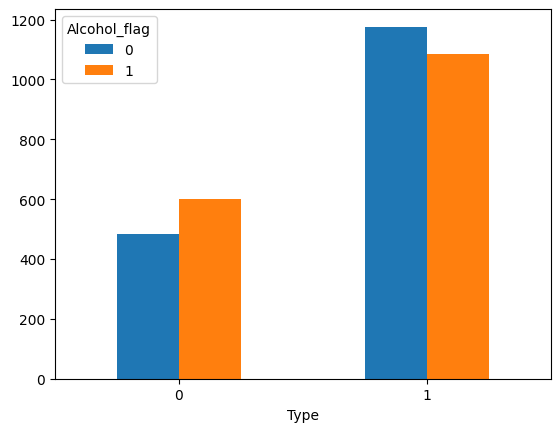

In [5]:
# Creating barplot

# x label rotation
barplot = p_crosstab.plot.bar(rot=0)

In [6]:
# Cross tabulation of Workclass and Sex

a_crosstab = pd.crosstab(wineDF.Type, wineDF.Sugar_flag)

print(a_crosstab)

Sugar_flag     0    1
Type                 
0            237  848
1           1382  878


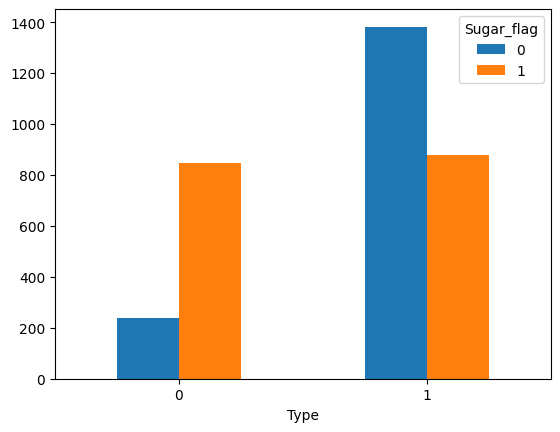

In [7]:
# Creating barplot

# x label rotation
barplot = a_crosstab.plot.bar(rot=0)

In [8]:
#Probability
red_count = (wineDF['Type'] == 0).sum()
white_count = (wineDF['Type'] == 1).sum()

# Calculate the total count of samples
total_samples = red_count + white_count

# Calculate the prior probabilities
prior_red = red_count / total_samples
prior_white = white_count / total_samples

print("Prior probability of Type = Red:", prior_red)

print("Prior probability of Type = White:", prior_white)



Prior probability of Type = Red: 0.3243647234678625
Prior probability of Type = White: 0.6756352765321375


In [9]:
#Alchol
high_count = (wineDF['Alcohol_flag'] == 0).sum()
low_count = (wineDF['Alcohol_flag'] == 1).sum()

# total count of samples
total_samples_alcohol = high_count + low_count

# Calculate the probabilities
probability_high_alcohol = high_count / total_samples_alcohol
probability_low_alcohol = low_count / total_samples_alcohol

print("Probability of High Alcohol Content:", probability_high_alcohol)

print("Probability of Low Alcohol Content:", probability_low_alcohol)


Probability of High Alcohol Content: 0.49656203288490286
Probability of Low Alcohol Content: 0.5034379671150971


In [30]:
# High/Low
high_sugar_count = (wineDF['Sugar_flag'] == 0).sum()
low_sugar_count = (wineDF['Sugar_flag'] == 1).sum()

# total count of samples
total_samples_sugar = high_sugar_count + low_sugar_count

# Calculate the probabilities
probability_high_sugar = high_sugar_count / total_samples_sugar
probability_low_sugar = low_sugar_count / total_samples_sugar

print("Probability of High Sugar Content:", probability_high_sugar)

print("Probability of Low Sugar Content:", probability_low_sugar)


Probability of High Sugar Content: 0.48400597907324366
Probability of Low Sugar Content: 0.5159940209267564


In [25]:
# Count of times of Type = Red
total_RedCount = (wineDF['Type'] == 0).sum()

# Count times of Type = Red and Alcohol_flag = High
high_alcoholRedCount = ((wineDF['Type'] == 0) & (wineDF['Alcohol_flag'] == 1)).sum()

# Count times of Type = Red and Alcohol_flag = Low
low_alcoholRedCount = ((wineDF['Type'] == 0) & (wineDF['Alcohol_flag'] == 0)).sum()

# Calculate conditional p for Alcohol with Type = Red
prob_highRed = high_alcoholRedCount / total_RedCount
prob_lowRed = low_alcoholRedCount / total_RedCount

print("P(Alcohol_flag = High | Type = Red):", prob_highRed)
print("P(Alcohol_flag = Low | Type = Red):", prob_lowRed)


P(Alcohol_flag = High | Type = Red): 0.5529953917050692
P(Alcohol_flag = Low | Type = Red): 0.4470046082949309


In [29]:
# Count of times of Type = Red
total_red_count = (wineDF['Type'] == 0).sum()

# Count times of Type = Red and Sugar_flag = High
high_sugar_RedCount = ((wineDF['Type'] == 0) & (wineDF['Sugar_flag'] == 1)).sum()

# Count times of Type = Red and Sugar_flag = Low
low_sugar_RedCount = ((wineDF['Type'] == 0) & (wineDF['Sugar_flag'] == 0)).sum()

# Calculate conditional p for Sugar with Type = Red
prob_highRsugar = high_sugar_RedCount / total_red_count
prob_lowRsugar = low_sugar_RedCount / total_red_count

print("P(Sugar_flag = High | Type = Red):", prob_highRsugar)
print("P(Sugar_flag = Low | Type = Red):", prob_lowRsugar)


P(Sugar_flag = High | Type = Red): 0.7815668202764977
P(Sugar_flag = Low | Type = Red): 0.2184331797235023


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# X & Y
X = wineDF[['Alcohol_flag', 'Sugar_flag']]
y = wineDF['Type']

# training/test ratios
ratios = [0.8, 0.75, 0.7, 0.6, 0.5]

for ratio in ratios:
    # Split the data into sets
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=(1 - ratio), random_state=42, stratify=y)

    # Gaussian NB classifier
    nb_classifier = GaussianNB()

    # Classifier to the training data
    nb_classifier.fit(trainX, trainY)

    # Predictiction
    preY = nb_classifier.predict(testX)

    # Calculate/Print
    accuracy = accuracy_score(testY, preY)

    print(f"Accuracy for {int(ratio*100)}-{int((1-ratio)*100)} split: {accuracy}")


Accuracy for 80-19 split: 0.7204783258594918
Accuracy for 75-25 split: 0.7228195937873357
Accuracy for 70-30 split: 0.7260956175298805
Accuracy for 60-40 split: 0.7242152466367713
Accuracy for 50-50 split: 0.7280334728033473


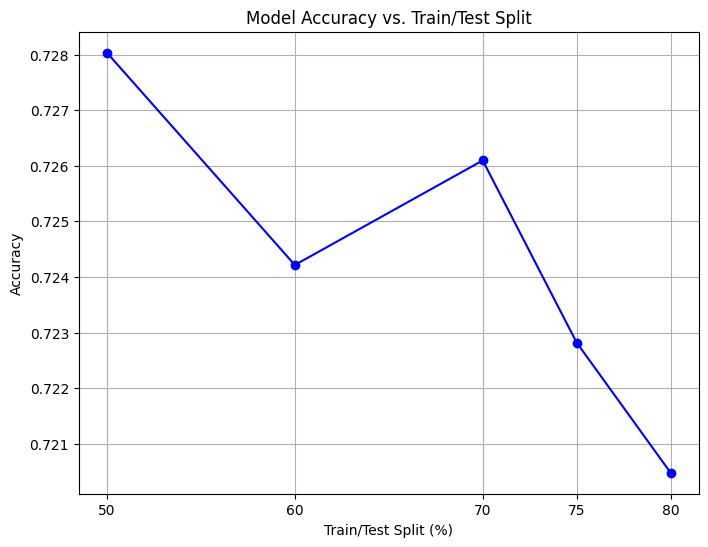

In [32]:
import matplotlib.pyplot as plt

# Accuracies
ratios = [80, 75, 70, 60, 50]
accuracies = [0.7204783258594918, 0.7228195937873357, 0.7260956175298805, 0.7242152466367713, 0.7280334728033473]

# Plotting my accuracies
plt.figure(figsize=(8, 6))
plt.plot(ratios, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Model Accuracy vs. Train/Test Split')
plt.xlabel('Train/Test Split (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(ratios)
plt.show()
